In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#dealing with warnings
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import probplot


from sklearn.preprocessing import QuantileTransformer

In [41]:
df = pd.read_csv('/kaggle/input/diabetes/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [44]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [49]:
print(df[df['BMI'] == 0].shape[0])
print(df[df['Glucose'] == 0].shape[0])
print(df[df['BloodPressure'] == 0].shape[0])
print(df[df['SkinThickness'] == 0].shape[0])
print(df[df['Insulin'] == 0].shape[0])

11
5
35
227
374


In [67]:
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())

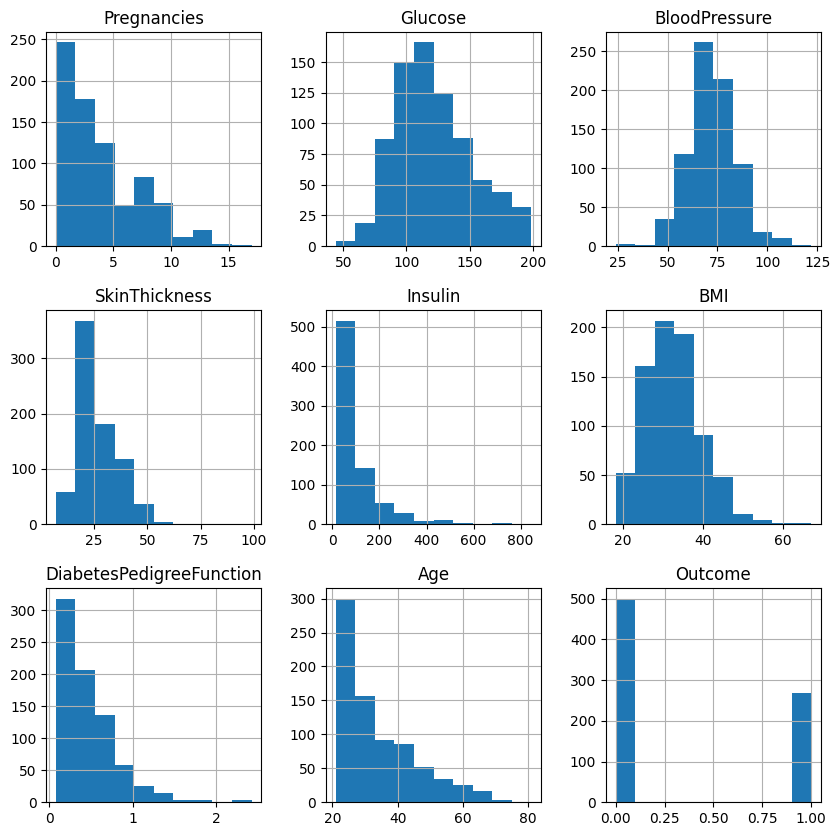

In [68]:
df.hist(bins = 10, figsize=(10, 10))
plt.show()

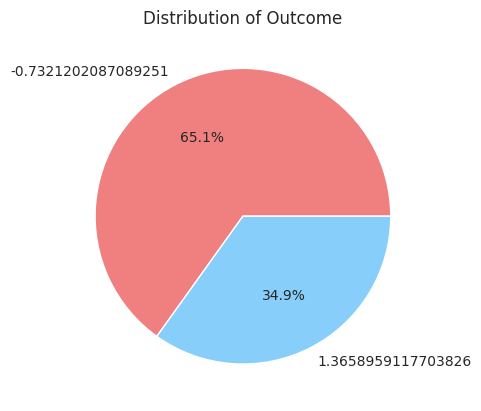

In [93]:
b = df['Outcome'].value_counts()
plt.pie(b, labels=b.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Outcome')
plt.show()

<Axes: xlabel='DiabetesPedigreeFunction'>

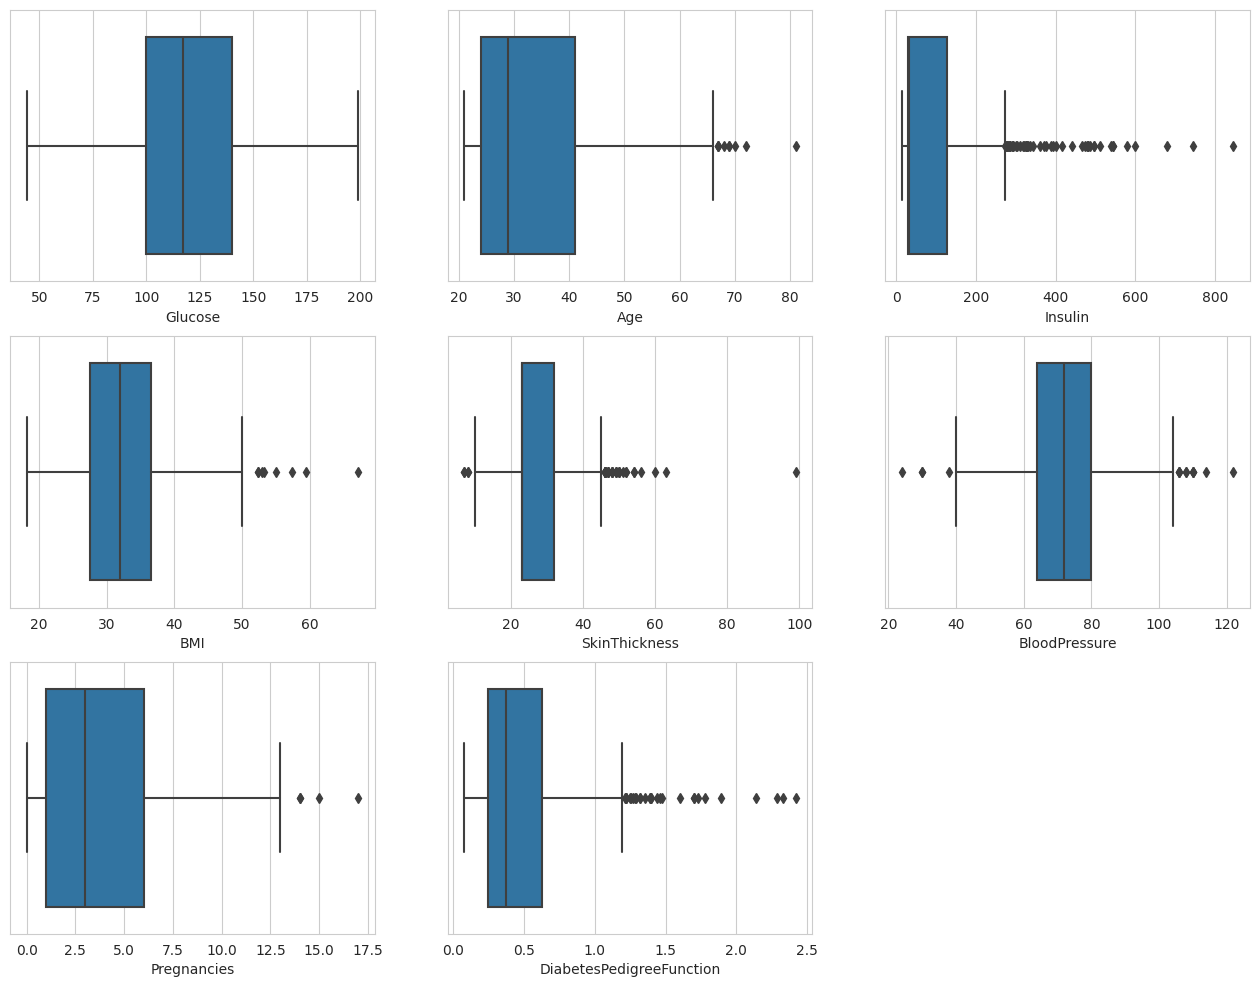

In [72]:
plt.figure(figsize = (16,12)) 
sns.set_style(style = 'whitegrid') 
plt.subplot(3, 3, 1) 
sns.boxplot(x = 'Glucose', data=df) 
plt.subplot(3 ,3 , 2) 
sns.boxplot(x = 'Age', data=df) 
plt.subplot(3 ,3 , 3) 
sns.boxplot(x = 'Insulin', data=df) 
plt.subplot(3 ,3 , 4) 
sns.boxplot(x = 'BMI', data=df) 
plt.subplot(3 ,3 , 5) 
sns.boxplot(x = 'SkinThickness', data=df) 
plt.subplot(3 ,3 , 6) 
sns.boxplot(x = 'BloodPressure', data=df) 
plt.subplot(3 ,3 , 7) 
sns.boxplot(x = 'Pregnancies', data=df) 
plt.subplot(3 ,3 , 8) 
sns.boxplot(x = 'DiabetesPedigreeFunction', data=df)

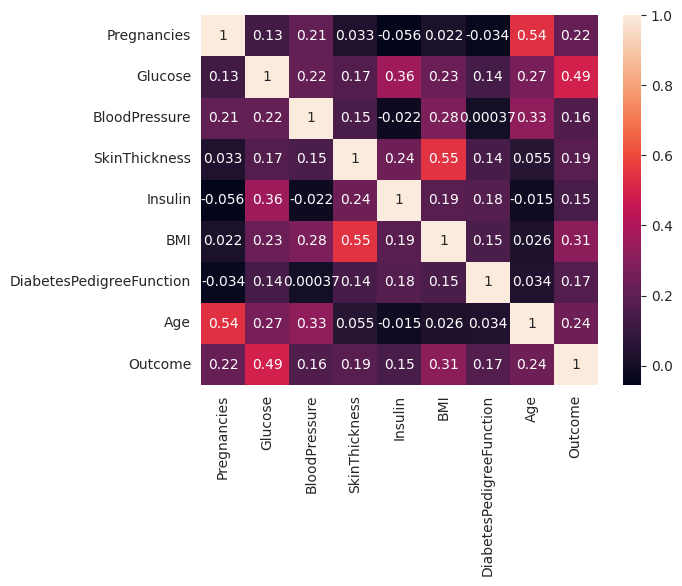

In [73]:
corr = df.corr()
sns.heatmap(corr, annot=True);

In [74]:
df= df.drop(['Insulin', 'BloodPressure', 'DiabetesPedigreeFunction'], axis ='columns')

In [78]:
a = df['Age']

In [81]:
Q1 = np.percentile(a, 25)
Q3 = np.percentile(a, 75)
IQR = Q3 - Q1
print(IQR)

17.0


In [83]:
iqr_threshold = 1.5
outliers_iqr = np.where((a < (Q1 - iqr_threshold * IQR)) | (a > (Q3 + iqr_threshold * IQR)))[0]
outliers_iqr

array([123, 363, 453, 459, 489, 537, 666, 674, 684])

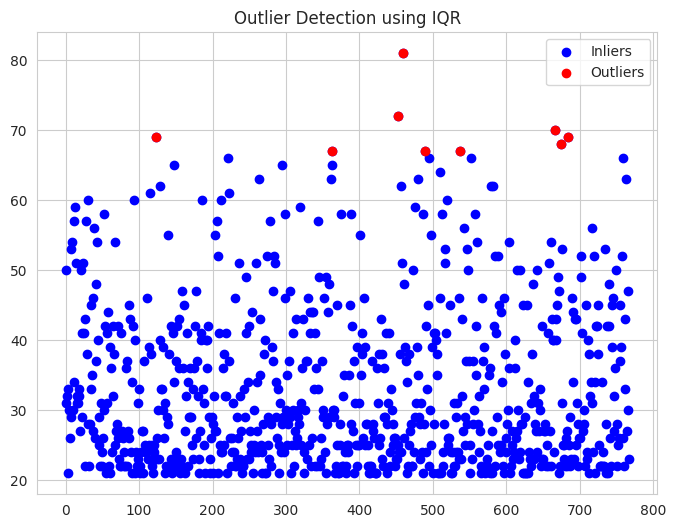

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(a)), a, c='blue', label='Inliers')
plt.scatter(outliers_iqr, a[outliers_iqr], c='red', label='Outliers')
plt.title("Outlier Detection using IQR")
plt.legend()
plt.show()

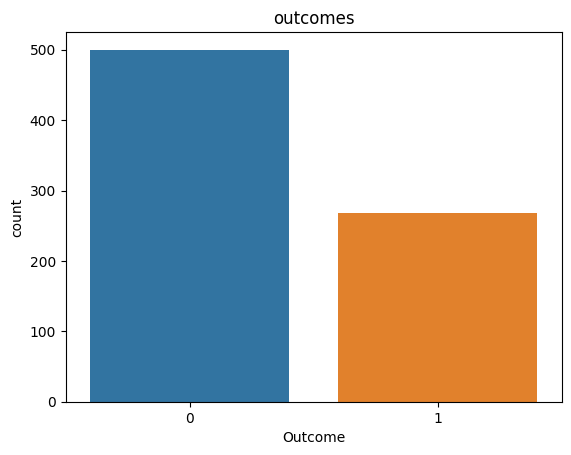

In [66]:
sns.countplot(x='Outcome',data=df)
plt.title("outcomes");

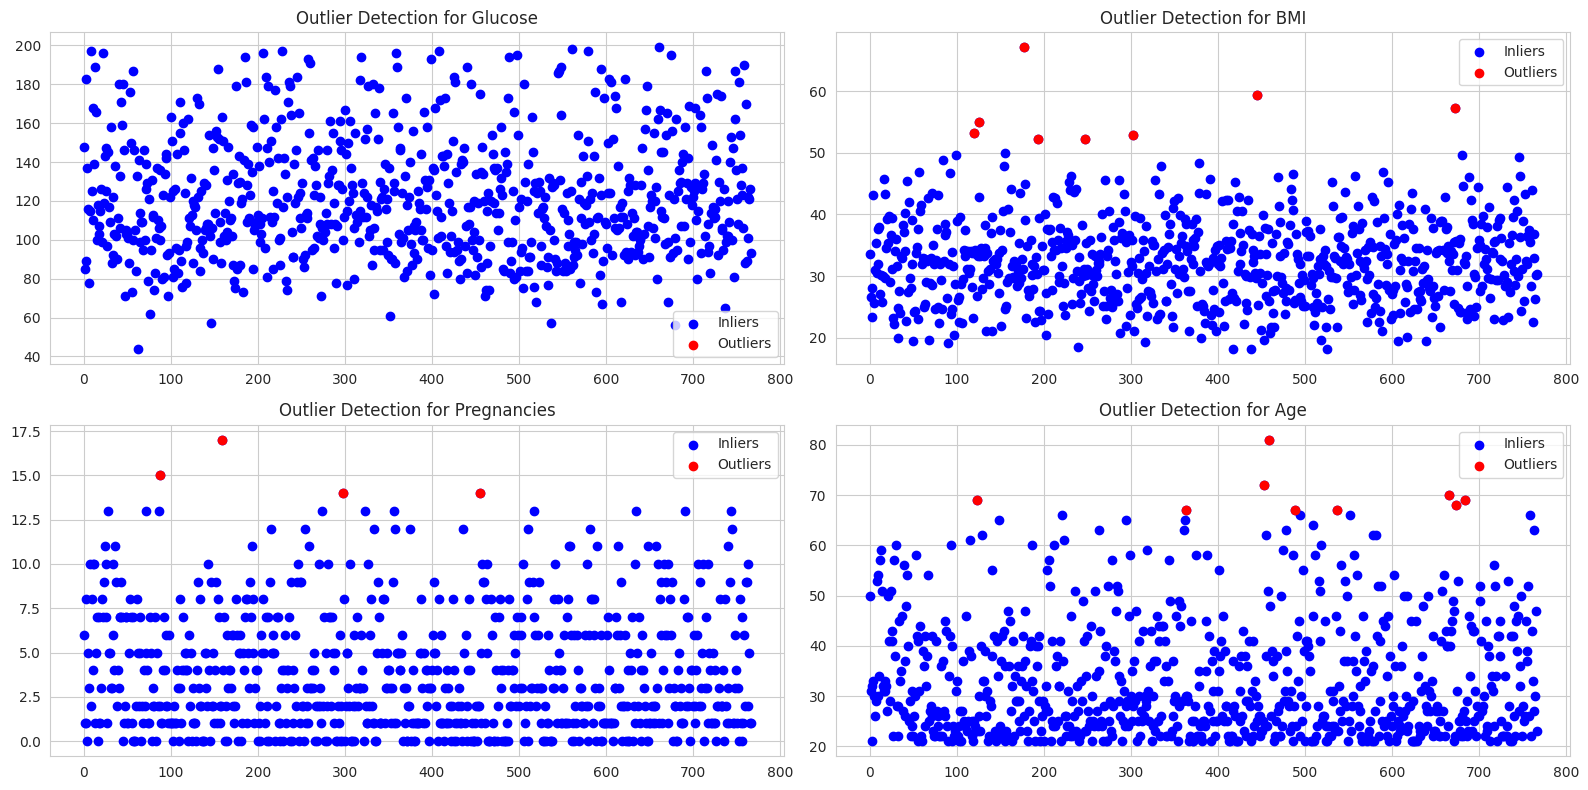

In [89]:
# List of columns
columns_of_interest = ['Glucose', 'BMI', 'Pregnancies', 'Age']

# Set up subplots
plt.figure(figsize=(16, 8))

# Loop through the selected columns
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(2, 2, i)  # Change to 2 rows, 2 columns

    # Get the column data
    a = df[column]

    # Calculate IQR and set the threshold
    Q1 = np.percentile(a, 25)
    Q3 = np.percentile(a, 75)
    IQR = Q3 - Q1
    iqr_threshold = 1.5

    # Identify outliers
    outliers_iqr = np.where((a < (Q1 - iqr_threshold * IQR)) | (a > (Q3 + iqr_threshold * IQR)))[0]

    # Plot the data points and outliers
    plt.scatter(range(len(a)), a, c='blue', label='Inliers')
    plt.scatter(outliers_iqr, a[outliers_iqr], c='red', label='Outliers')

    # Set plot title
    plt.title(f'Outlier Detection for {column}')
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [92]:
scaler = StandardScaler()
columns_to_standardize = ['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.639947,0.865276,0.831114,0.167240,1.425995,1.365896
1,-0.844885,-1.205989,0.180566,-0.851551,-0.190672,-0.732120
2,1.233880,2.015979,-0.469981,-1.331838,-0.105584,1.365896
3,-0.844885,-1.074480,-0.469981,-0.633239,-1.041549,-0.732120
4,-1.141852,0.503626,0.831114,1.549885,-0.020496,1.365896


<Axes: xlabel='Pregnancies'>

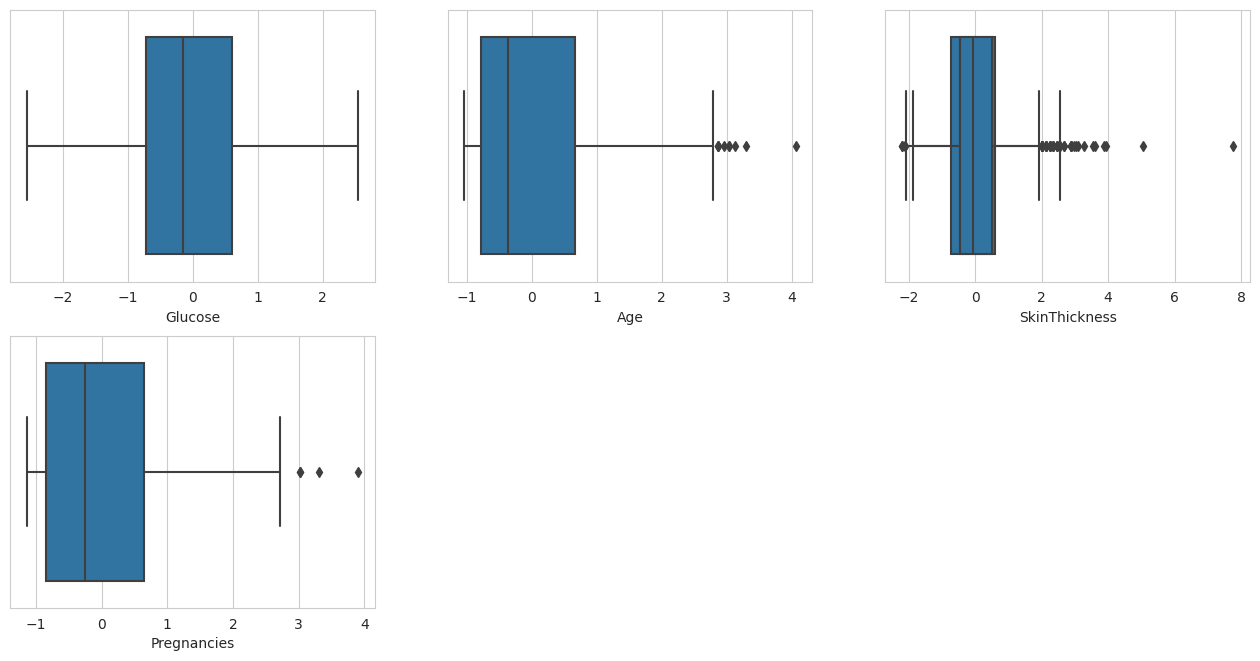

In [95]:
plt.figure(figsize = (16,12)) 
sns.set_style(style = 'whitegrid') 
plt.subplot(3, 3, 1) 
sns.boxplot(x = 'Glucose', data=df) 
plt.subplot(3 ,3 , 2) 
sns.boxplot(x = 'Age', data=df) 
plt.subplot(3 ,3 , 3) 
sns.boxplot(x = 'BMI', data=df) 
plt.subplot(3 ,3 , 3) 
sns.boxplot(x = 'SkinThickness', data=df) 
plt.subplot(3 ,3 , 4) 
sns.boxplot(x = 'Pregnancies', data=df) 

In [103]:
x=df[['Pregnancies', 'Glucose','SkinThickness','BMI','Age']]
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


<Axes: xlabel='Pregnancies'>

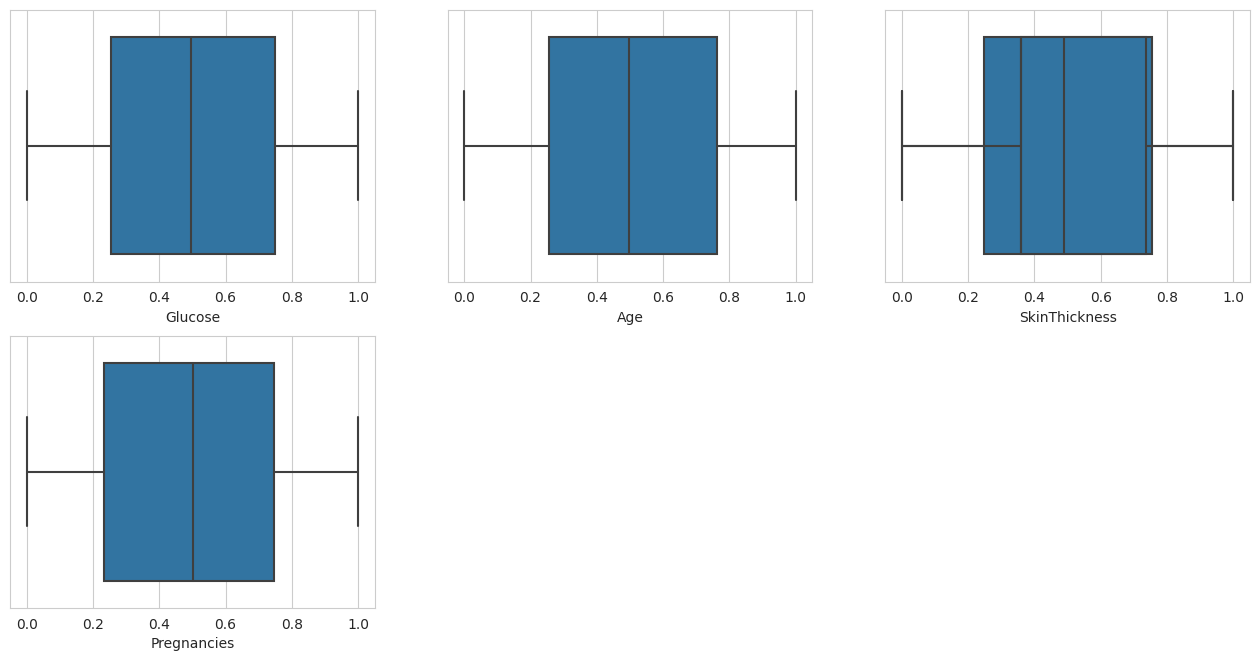

In [104]:
plt.figure(figsize = (16,12)) 
sns.set_style(style = 'whitegrid') 
plt.subplot(3, 3, 1) 
sns.boxplot(x = 'Glucose', data=df_new) 
plt.subplot(3 ,3 , 2) 
sns.boxplot(x = 'Age', data=df_new) 
plt.subplot(3 ,3 , 3) 
sns.boxplot(x = 'BMI', data=df_new) 
plt.subplot(3 ,3 , 3) 
sns.boxplot(x = 'SkinThickness', data=df_new) 
plt.subplot(3 ,3 , 4) 
sns.boxplot(x = 'Pregnancies', data=df_new) 

In [105]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [106]:
X_train.shape,y_train.shape

((614, 5), (614,))